In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
# Chemin vers tes données
file_path = "Data_ML/SC_FC_dataset_filtered_68x68.h5"

# Charger les données depuis le fichier h5 (uniquement FC_correlation)
with h5py.File(file_path, "r") as f:
    # Chargement FC_correlation pour les patients sains (CTRL)
    ctrl_FC = f["FC_correlation"]["ctrl"][:]  # (27, 68, 68)
    
    # Chargement FC_correlation pour les patients schizophrènes (SCHZ)
    schz_FC = f["FC_correlation"]["schz"][:]  # (27, 68, 68)

# Vérification des dimensions
print("CTRL FC shape:", ctrl_FC.shape)   # attendu (27,68,68)
print("SCHZ FC shape:", schz_FC.shape)   # attendu (27,68,68)

# Concaténation des données
X_FC = np.concatenate([ctrl_FC, schz_FC], axis=0)  # (54, 68, 68)

# Création des labels correspondants
y_labels = np.array([0]*len(ctrl_FC) + [1]*len(schz_FC))  # 0: CTRL, 1: SCHZ

# Flatten chaque matrice FC en vecteur
X_FC_flat = X_FC.reshape(X_FC.shape[0], -1)  # shape finale (54, 4624)

# Vérification finale
print("Data finale (patients, features):", X_FC_flat.shape)
print("Labels shape:", y_labels.shape)



CTRL FC shape: (27, 68, 68)
SCHZ FC shape: (27, 68, 68)
Data finale (patients, features): (54, 4624)
Labels shape: (54,)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from collections import Counter

# 📌 Séparer les indices des patients CTRL et SCHZ explicitement
ctrl_indices = [i for i, label in enumerate(y_labels) if label == 0]  # CTRL
schz_indices = [i for i, label in enumerate(y_labels) if label == 1]  # SCHZ

# 📌 Séparer chaque groupe en train/test séparément (50% train/test par exemple)
ctrl_train_idx, ctrl_test_idx = train_test_split(
    ctrl_indices, test_size=0.3, random_state=42
)

schz_train_idx, schz_test_idx = train_test_split(
    schz_indices, test_size=0.3, random_state=42
)

# 📌 Fusion des indices pour créer des jeux équilibrés
train_indices = ctrl_train_idx + schz_train_idx
test_indices = ctrl_test_idx + schz_test_idx

# 📌 Création claire des jeux de données finaux
X_train = X_FC_flat[train_indices]
y_train = y_labels[train_indices]

X_test = X_FC_flat[test_indices]
y_test = y_labels[test_indices]

# 📌 Vérification explicite de la répartition des classes
print("Répartition des classes dans Train :", Counter(y_train))
print("Répartition des classes dans Test :", Counter(y_test))


Répartition des classes dans Train : Counter({0: 18, 1: 18})
Répartition des classes dans Test : Counter({0: 9, 1: 9})



📌 Rapport de classification :
              precision    recall  f1-score   support

        CTRL       0.58      0.78      0.67         9
        SCHZ       0.67      0.44      0.53         9

    accuracy                           0.61        18
   macro avg       0.62      0.61      0.60        18
weighted avg       0.62      0.61      0.60        18



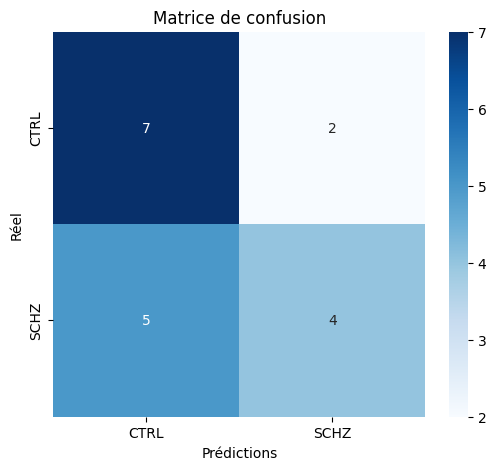

In [21]:
# 📌 Régression logistique classique
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# 📌 Prédictions et rapport clair
preds = logreg.predict(X_test)

print("\n📌 Rapport de classification :")
print(classification_report(y_test, preds, target_names=["CTRL", "SCHZ"]))

conf_matrix = confusion_matrix(y_test, preds)

# 📌 Affichage de la matrice de confusion
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['CTRL', 'SCHZ'], yticklabels=['CTRL', 'SCHZ'])
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()


Répartition des classes dans Train : Counter({0: 18, 1: 18})
Répartition des classes dans Test : Counter({0: 9, 1: 9})

📌 Rapport de classification (3 matrices) :
              precision    recall  f1-score   support

        CTRL       0.58      0.78      0.67         9
        SCHZ       0.67      0.44      0.53         9

    accuracy                           0.61        18
   macro avg       0.62      0.61      0.60        18
weighted avg       0.62      0.61      0.60        18



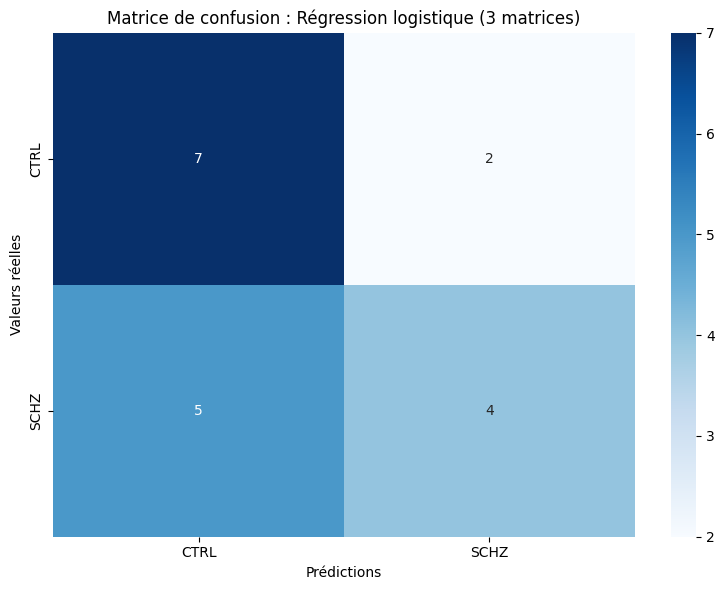

In [ ]:
# 📌 Charger les 3 matrices depuis ton fichier
file_path = "Data_ML/SC_FC_dataset_filtered_68x68.h5"

with h5py.File(file_path, "r") as f:
    ctrl_FC = f["FC_correlation"]["ctrl"][:]
    schz_FC = f["FC_correlation"]["schz"][:]
    ctrl_ADC = f["SC_ADC"]["ctrl"][:]
    schz_ADC = f["SC_ADC"]["schz"][:]
    ctrl_density = f["SC_density"]["ctrl"][:]
    schz_density = f["SC_density"]["schz"][:]

# 📌 Stack clairement les matrices (3 canaux)
ctrl_data = np.stack([ctrl_FC, ctrl_ADC, ctrl_density], axis=1)
schz_data = np.stack([schz_FC, schz_ADC, schz_density], axis=1)

# 📌 Aplatir chaque groupe en vecteurs
ctrl_flat = ctrl_data.reshape(len(ctrl_data), -1)  # (27, 3*68*68)
schz_flat = schz_data.reshape(len(schz_data), -1)  # (27, 3*68*68)

# 📌 Créer les indices relatifs à chaque groupe (0 à 26)
ctrl_indices = np.arange(len(ctrl_flat))
schz_indices = np.arange(len(schz_flat))

# 📌 Séparer train/test chaque groupe clairement (70% train, 30% test)
ctrl_train_idx, ctrl_test_idx = train_test_split(ctrl_indices, test_size=0.3, random_state=42)
schz_train_idx, schz_test_idx = train_test_split(schz_indices, test_size=0.3, random_state=42)

# 📌 Finaliser clairement les datasets en utilisant ces indices relatifs
X_train = np.concatenate([ctrl_flat[ctrl_train_idx], schz_flat[schz_train_idx]])
y_train = np.array([0]*len(ctrl_train_idx) + [1]*len(schz_train_idx))

X_test = np.concatenate([ctrl_flat[ctrl_test_idx], schz_flat[schz_test_idx]])
y_test = np.array([0]*len(ctrl_test_idx) + [1]*len(schz_test_idx))

# 📌 Vérification des proportions
print("Répartition des classes dans Train :", Counter(y_train))
print("Répartition des classes dans Test :", Counter(y_test))

# 📌 Entraînement régression logistique
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# 📌 Prédictions et performances
preds = logreg.predict(X_test)

print("\n📌 Rapport de classification (3 matrices) :")
print(classification_report(y_test, preds, target_names=["CTRL", "SCHZ"]))

# 📌 Matrice de confusion avec sns
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["CTRL", "SCHZ"], yticklabels=["CTRL", "SCHZ"])
plt.title("Matrice de confusion : Régression logistique (3 matrices)")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.tight_layout()
plt.show()
